In [63]:
import MMM_010519 as MMM
import warnings
import pandas as pd
import numpy as np
import os


# df_LL_all_models.to_pickle("data/010519/temp_results")


In [114]:
df_ctm = pd.read_csv("/Users/dror/PycharmProjects/MMM workshop/data/final_data/ctm15_unsummed.csv")



In [116]:
df_ctm.insert(loc = 0, column = 'score', value = df_ctm.sum(axis=1))

In [122]:
df_ctm_final = df_ctm.iloc[:,0:1]

In [123]:
df_ctm_final['model'] = 'ctm'
df_ctm_final['iter'] = df_ctm_final.index
df_ctm_final['topics'] = 15

/Users/dror/.conda/envs/MMM workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dror/.conda/envs/MMM workshop/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dror/.conda/envs/MMM workshop/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [126]:
df_ctm_final.to_csv("data/final_data/ctm_crossval_results_15.csv")

In [124]:
df_ctm_final

,score,model,iter,topics
0,-1118.428658,ctm,0,15
1,-1117.404229,ctm,1,15
2,-1116.400145,ctm,2,15
3,-1115.406528,ctm,3,15
4,-1114.404494,ctm,4,15
5,-1113.402669,ctm,5,15
6,-1112.411901,ctm,6,15
7,-1111.393659,ctm,7,15
8,-1110.403080,ctm,8,15
9,-1109.387087,ctm,9,15


In [194]:
mmm_12 = pd.read_csv('data/final_data/mmm_crossval_results_12.csv').drop('Unnamed: 0', axis = 1)
mmm_15 = pd.read_csv('data/final_data/mmm_crossval_results_15.csv').drop('Unnamed: 0', axis = 1)
lda_12 = pd.read_csv('data/final_data/lda_crossval_results_12.csv').drop('Unnamed: 0', axis = 1)
lda_15 = pd.read_csv('data/final_data/lda_crossval_results_15.csv').drop('Unnamed: 0', axis = 1)
ctm_15 = pd.read_csv('data/final_data/ctm_crossval_results_15.csv').drop('Unnamed: 0', axis = 1)
ctm_12 = pd.read_csv('/Users/dror/PycharmProjects/MMM workshop/data/final_data/ctm_crossval_results_12.csv').drop('Unnamed: 0', axis = 1)

In [196]:
final_df = pd.concat([mmm_12, mmm_15, lda_12, lda_15, ctm_15, ctm_12])

In [160]:
# final_df = final_df.drop('Unnamed: 0', axis = 1)

In [197]:
final_df = final_df.reset_index().drop('index', axis = 1)

In [199]:
import seaborn as sns
from matplotlib import pyplot as plt

In [200]:
mask_12 = final_df.topics == 12
mask_15 = final_df.topics == 15
mask_lda = final_df.model == 'lda'
mask_mmm = final_df.model == 'mmm'
mask_ctm = final_df.model == 'ctm'


In [201]:
final_df.topics.astype(int)
final_df

,score,model,iter,topics
0,-1049.385205,mmm,0,12
1,-1049.690610,mmm,1,12
2,-1049.400285,mmm,2,12
3,-1049.016754,mmm,3,12
4,-1049.634612,mmm,4,12
5,-1049.147541,mmm,5,12
6,-1049.309411,mmm,6,12
7,-1049.669893,mmm,7,12
8,-1049.053046,mmm,8,12
9,-1049.531606,mmm,9,12


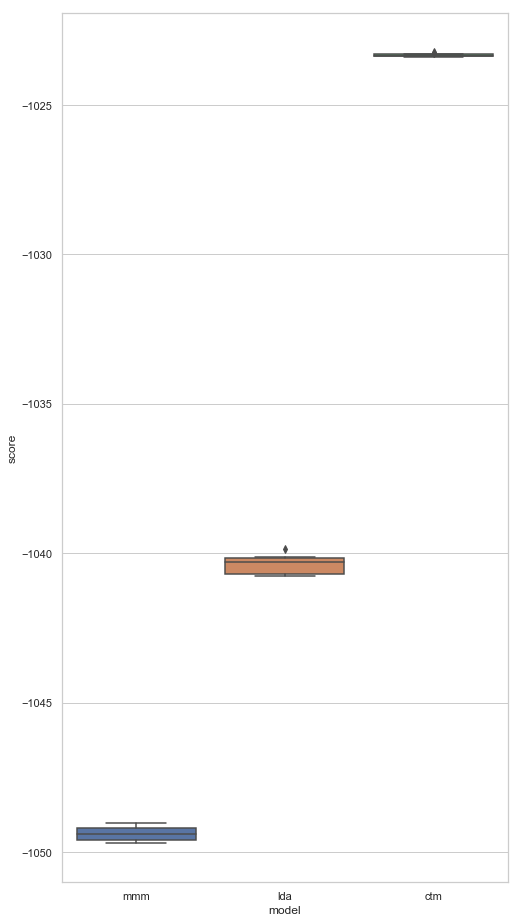

In [209]:
mask = mask_12


sns.set(style="whitegrid")


plt.figure(figsize=(8,16))



# plt.figure(figsize=(10,6))
'''
ax = sns.boxplot(x="model", y="score", 
                 data=final_df,
                 linewidth=1.5,
                 hue = 'topics',
                 whis = 0.5
                )
                '''

ax = sns.boxplot(x="model", y="score", 
                 data=final_df.loc[mask,],
                 linewidth=1.5,
                 whis = 0.5
                )
# ax.set(ylim=(-1060, -1035))


# final_df.groupby('model').boxplot('score')
# final_df.loc[mask, ['score', 'model']].boxplot(x='model', y='score')

# sns.boxenplot(final_df.loc[mask, ['score', 'model']])

# df.plot(x="A", y=["B1", "C1", "D1", "E1"], ax=ax)


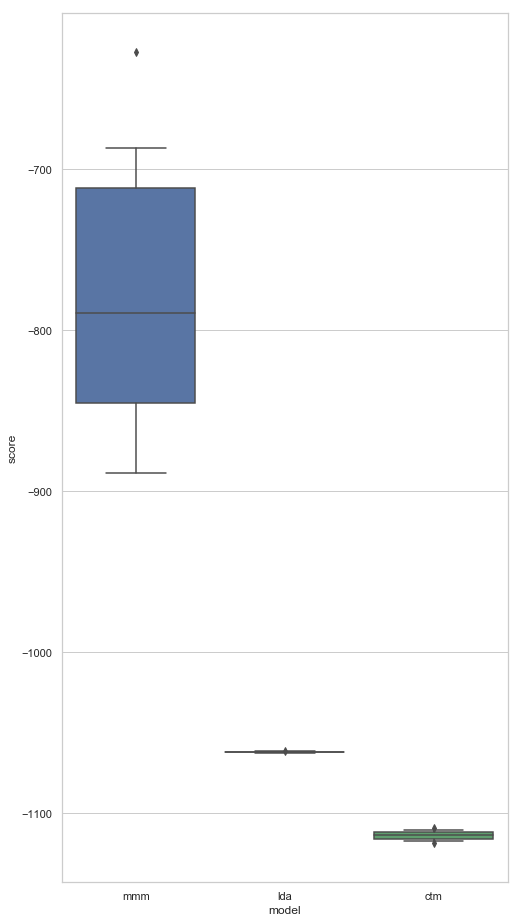

In [210]:
mask = mask_15


sns.set(style="whitegrid")


plt.figure(figsize=(8,16))



# plt.figure(figsize=(10,6))
'''
ax = sns.boxplot(x="model", y="score", 
                 data=final_df,
                 linewidth=1.5,
                 hue = 'topics',
                 whis = 0.5
                )
                '''

ax = sns.boxplot(x="model", y="score", 
                 data=final_df.loc[mask,],
                 linewidth=1.5,
                 whis = 0.5
                )
# ax.set(ylim=(-1060, -1035))


# final_df.groupby('model').boxplot('score')
# final_df.loc[mask, ['score', 'model']].boxplot(x='model', y='score')

# sns.boxenplot(final_df.loc[mask, ['score', 'model']])

# df.plot(x="A", y=["B1", "C1", "D1", "E1"], ax=ax)


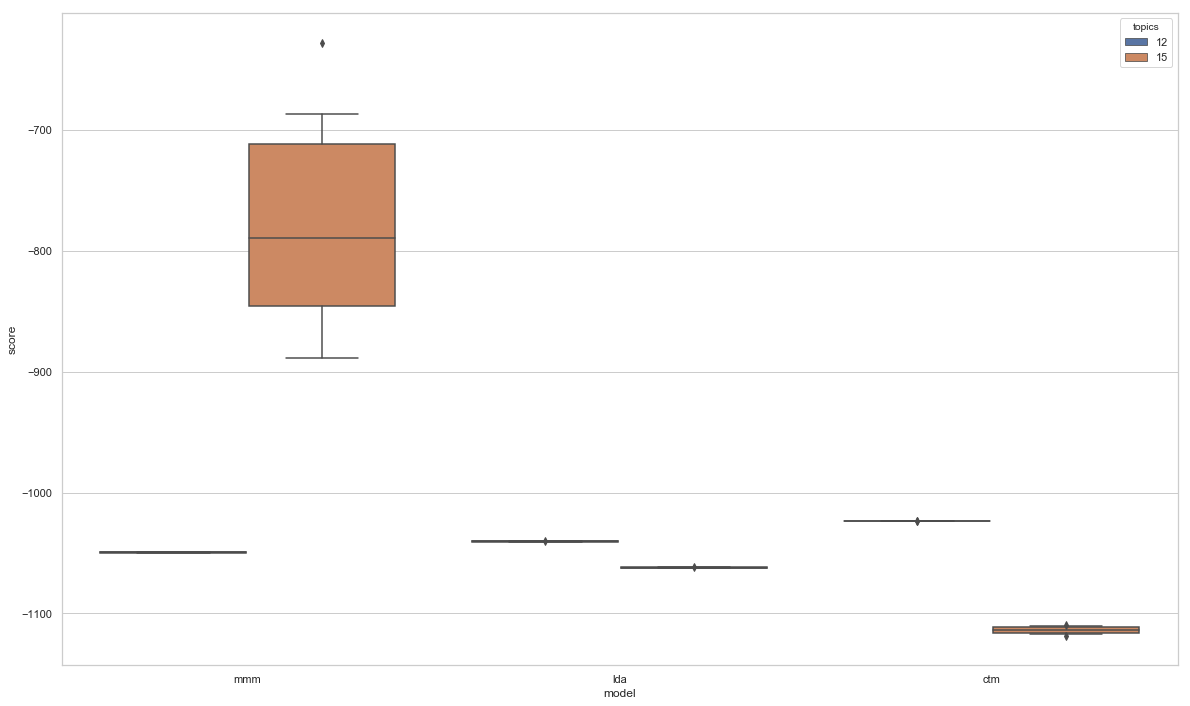

In [211]:
# mask = mask_15
plt.figure(figsize=(20,12))

ax = sns.boxplot(x="model", y="score", 
                 data=final_df,
                 linewidth=1.5,
                 whis = 0.5,
                 hue = 'topics'
                )


In [112]:
final_df.loc[mask,]

,score,model,iter,topics
0,-1049.385205,mmm,0,12
1,-1049.690610,mmm,1,12
2,-1049.400285,mmm,2,12
3,-1049.016754,mmm,3,12
4,-1049.634612,mmm,4,12
5,-1049.147541,mmm,5,12
6,-1049.309411,mmm,6,12
7,-1049.669893,mmm,7,12
8,-1049.053046,mmm,8,12
9,-1049.531606,mmm,9,12


In [38]:
from glob import glob
import os
import pandas as pd

In [48]:
files = []
final_df = pd.DataFrame()
path = "data/final_data/"
for file in os.listdir(path):
    if file.endswith("cv_res.csv"):
        temp = pd.read_csv(path+file).drop('Unnamed: 0', axis = 1)
        print(temp)
        final_df = pd.concat([final_df, temp])
        

          score       model  iter  topics
0 -1.627798e+07  mmm_denovo     0      12
1 -1.627799e+07  mmm_denovo     1      12
2 -1.627794e+07  mmm_denovo     2      12
          score      model  iter  topics
0 -1.631141e+07  lda_refit     0      12
1 -1.631237e+07  lda_refit     1      12
2 -1.631150e+07  lda_refit     2      12
          score       model  iter  topics
0 -1.627776e+07  mmm_denovo     0      14
1 -1.627775e+07  mmm_denovo     1      14
2 -1.627778e+07  mmm_denovo     2      14
          score      model  iter  topics
0 -1.746349e+07  ctm_refit     0      14
1 -1.746310e+07  ctm_refit     1      14
2 -1.746222e+07  ctm_refit     2      14
          score      model  iter  topics
0 -1.630450e+07  lda_refit     0      14
1 -1.630268e+07  lda_refit     1      14
2 -1.630305e+07  lda_refit     2      14
          score      model  iter  topics
0 -1.642465e+07  mmm_refit     0      12
1 -1.642689e+07  mmm_refit     1      12
2 -1.642546e+07  mmm_refit     2      12
        

In [49]:
final_df

,score,model,iter,topics
0,-1.627798e+07,mmm_denovo,0,12
1,-1.627799e+07,mmm_denovo,1,12
2,-1.627794e+07,mmm_denovo,2,12
0,-1.631141e+07,lda_refit,0,12
1,-1.631237e+07,lda_refit,1,12
2,-1.631150e+07,lda_refit,2,12
0,-1.627776e+07,mmm_denovo,0,14
1,-1.627775e+07,mmm_denovo,1,14
2,-1.627778e+07,mmm_denovo,2,14
0,-1.746349e+07,ctm_refit,0,14


In [45]:
final_df = pd.concat([mmm12_denovo, mmm12_refit, mmm14_denovo, ctm12_refit, ctm14_refit, lda12_refit, lda14_refit], axis = 0)
final_df = final_df.reset_index().drop('index', axis = 1)

/Users/dror/.conda/envs/MMM workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
final_df.reset_index().to_csv("data/final_data/all_models_refit_longform.csv")


In [ ]:
ctm12 = MMM.upload_model("data/input_data/CTM_12_e.csv","data/input_data/CTM_12_pi.csv",12, 'ctm')

In [69]:
X = pd.read_csv("data/input_data/mutation_counts.csv",index_col=0) #Mutation counts matrix


final_df = pd.DataFrame()
path = "data/input_data/"
pi_files = []
e_files = []
for file in os.listdir(path):  
    if file.endswith("_pi.csv"):
        pi_files.append(file)
        continue
    elif file.endswith('_e.csv'):
        e_files.append(file)
        continue
        
e_files.sort()
pi_files.sort()
print(e_files, pi_files)
    
ll_dict = {}
for i in range(4):
    print(f"data/input_data/{pi_files[i]}")
    model = MMM.upload_model(f"data/input_data/{e_files[i]}",f"data/input_data/{pi_files[i]}", int(e_files[i][4:6]), e_files[i][0:3])
    ll_dict[e_files[i][:6]] = MMM.Theta.log_likelihood2(X, model)

['CTM_12_e.csv', 'CTM_14_e.csv', 'LDA_12_e.csv', 'LDA_14_e.csv'] ['CTM_12_pi.csv', 'CTM_14_pi.csv', 'LDA_12_pi.csv', 'LDA_14_pi.csv']
data/input_data/CTM_12_pi.csv
Changed num of topics to : 12


/Users/dror/PycharmProjects/MMM workshop/MMM_010519.py:405: RuntimeWarning: divide by zero encountered in log
  theta.e = np.log(terms.values)


data/input_data/CTM_14_pi.csv
Changed num of topics to : 14


/Users/dror/PycharmProjects/MMM workshop/MMM_010519.py:405: RuntimeWarning: divide by zero encountered in log
  theta.e = np.log(terms.values)


data/input_data/LDA_12_pi.csv
Changed num of topics to : 12
data/input_data/LDA_14_pi.csv
Changed num of topics to : 14


In [70]:
ll_dict


{'CTM_12': -17081883.02784384,
 'CTM_14': -17089260.901744783,
 'LDA_12': -13677004.263069535,
 'LDA_14': -13674419.078507492}